In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/car-prices-poland/Car_Prices_Poland_Kaggle.csv')
df.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [3]:
# 1. Dealing with Missing Values
df.isnull().sum()  # Check the number of missing values 

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [4]:
# 2. Figuring out why the data is missing
#Because all car dont require has generation_name

In [5]:
# 3. Eliminating extra variables
df = df.drop(['generation_name'], axis=1)

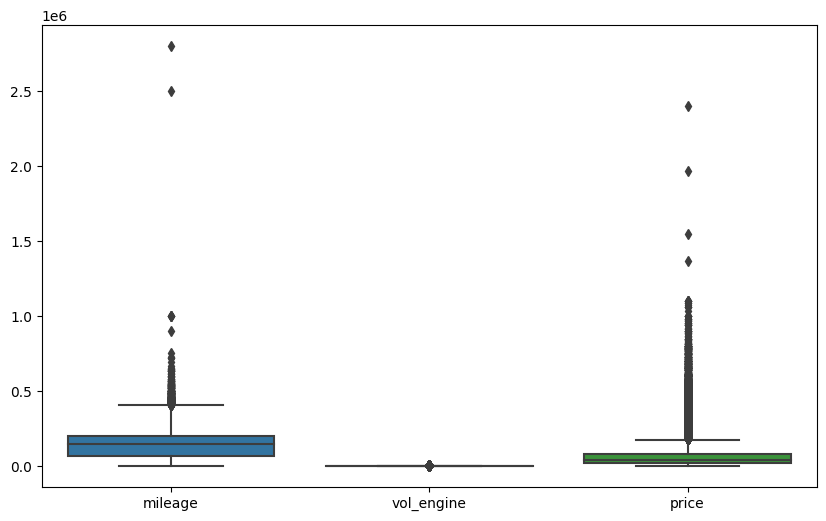

In [6]:
#4. Detecting and removing outliers using box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['mileage', 'vol_engine', 'price']])
plt.show()

In [7]:
# Remove outliers using z-score
from scipy import stats
df = df[(np.abs(stats.zscore(df[['mileage', 'vol_engine', 'price']])) < 3).all(axis=1)]

In [8]:
#5- Scaling and Normalization.
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = [ 'mileage', 'vol_engine', 'price']
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print the scaled and normalized dataset
print(df)

        Unnamed: 0   mark  model  year   mileage  vol_engine      fuel  \
0                0   opel  combo  2015  0.333895    0.334495    Diesel   
1                1   opel  combo  2018  0.076533    0.401769    Diesel   
2                2   opel  combo  2015  0.666117    0.428303    Diesel   
3                3   opel  combo  2016  0.113876    0.334495    Diesel   
4                4   opel  combo  2014  0.246411    0.375235       CNG   
...            ...    ...    ...   ...       ...         ...       ...   
117922      117922  volvo  xc-90  2020  0.095694    0.527741    Hybrid   
117923      117923  volvo  xc-90  2017  0.122010    0.527741    Diesel   
117924      117924  volvo  xc-90  2016  0.199761    0.527741  Gasoline   
117925      117925  volvo  xc-90  2017  0.416268    0.527741    Diesel   
117926      117926  volvo  xc-90  2016  0.452201    0.527741  Gasoline   

                    city       province     price  
0                  Janki    Mazowieckie  0.109181  
1      

In [9]:
df

,Unnamed: 0,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,2015,0.333895,0.334495,Diesel,Janki,Mazowieckie,0.109181
1,1,opel,combo,2018,0.076533,0.401769,Diesel,Katowice,Śląskie,0.240572
2,2,opel,combo,2015,0.666117,0.428303,Diesel,Brzeg,Opolskie,0.081732
3,3,opel,combo,2016,0.113876,0.334495,Diesel,Korfantów,Opolskie,0.093452
4,4,opel,combo,2014,0.246411,0.375235,CNG,Tarnowskie Góry,Śląskie,0.109181
...,...,...,...,...,...,...,...,...,...,...
117922,117922,volvo,xc-90,2020,0.095694,0.527741,Hybrid,Katowice,Śląskie,0.685589
117923,117923,volvo,xc-90,2017,0.122010,0.527741,Diesel,Chechło Pierwsze,Łódzkie,0.707518
117924,117924,volvo,xc-90,2016,0.199761,0.527741,Gasoline,Pruszcz Gdański,Pomorskie,0.414826
117925,117925,volvo,xc-90,2017,0.416268,0.527741,Diesel,Kalisz,Wielkopolskie,0.474969


In [10]:
# Encoding categorical variables using Label Encoding for high cardinality features
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
high_cardinality_features = ['mark', 'model', 'city']
for feature in high_cardinality_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [11]:
df

,Unnamed: 0,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,0,15,88,2015,0.333895,0.334495,Diesel,1143,Mazowieckie,0.109181
1,1,15,88,2018,0.076533,0.401769,Diesel,1345,Śląskie,0.240572
2,2,15,88,2015,0.666117,0.428303,Diesel,297,Opolskie,0.081732
3,3,15,88,2016,0.113876,0.334495,Diesel,1488,Opolskie,0.093452
4,4,15,88,2014,0.246411,0.375235,CNG,3553,Śląskie,0.109181
...,...,...,...,...,...,...,...,...,...,...
117922,117922,22,316,2020,0.095694,0.527741,Hybrid,1345,Śląskie,0.685589
117923,117923,22,316,2017,0.122010,0.527741,Diesel,414,Łódzkie,0.707518
117924,117924,22,316,2016,0.199761,0.527741,Gasoline,2729,Pomorskie,0.414826
117925,117925,22,316,2017,0.416268,0.527741,Diesel,1285,Wielkopolskie,0.474969


In [12]:
df_encoded = pd.get_dummies(df, columns=['fuel', 'province'])
df_encoded

,Unnamed: 0,mark,model,year,mileage,vol_engine,city,price,fuel_CNG,fuel_Diesel,...,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wiedeń,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie
0,0,15,88,2015,0.333895,0.334495,1143,0.109181,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1,15,88,2018,0.076533,0.401769,1345,0.240572,False,True,...,False,False,False,False,False,False,False,False,True,False
2,2,15,88,2015,0.666117,0.428303,297,0.081732,False,True,...,False,False,False,False,False,False,False,False,False,False
3,3,15,88,2016,0.113876,0.334495,1488,0.093452,False,True,...,False,False,False,False,False,False,False,False,False,False
4,4,15,88,2014,0.246411,0.375235,3553,0.109181,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117922,117922,22,316,2020,0.095694,0.527741,1345,0.685589,False,False,...,False,False,False,False,False,False,False,False,True,False
117923,117923,22,316,2017,0.122010,0.527741,414,0.707518,False,True,...,False,False,False,False,False,False,False,True,False,False
117924,117924,22,316,2016,0.199761,0.527741,2729,0.414826,False,False,...,False,True,False,False,False,False,False,False,False,False
117925,117925,22,316,2017,0.416268,0.527741,1285,0.474969,False,True,...,False,False,False,False,False,True,False,False,False,False


In [13]:
df_encoded=df_encoded.drop('Unnamed: 0' , axis=1)
df_encoded

,mark,model,year,mileage,vol_engine,city,price,fuel_CNG,fuel_Diesel,fuel_Electric,...,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wiedeń,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie
0,15,88,2015,0.333895,0.334495,1143,0.109181,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,15,88,2018,0.076533,0.401769,1345,0.240572,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,15,88,2015,0.666117,0.428303,297,0.081732,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,15,88,2016,0.113876,0.334495,1488,0.093452,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,15,88,2014,0.246411,0.375235,3553,0.109181,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117922,22,316,2020,0.095694,0.527741,1345,0.685589,False,False,False,...,False,False,False,False,False,False,False,False,True,False
117923,22,316,2017,0.122010,0.527741,414,0.707518,False,True,False,...,False,False,False,False,False,False,False,True,False,False
117924,22,316,2016,0.199761,0.527741,2729,0.414826,False,False,False,...,False,True,False,False,False,False,False,False,False,False
117925,22,316,2017,0.416268,0.527741,1285,0.474969,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_encoded is your dataframe with missing values
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Splitting the data
X = df_imputed.drop('price', axis=1)
y = df_imputed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.001998641889590882
R^2 Score: 0.9410678862147593
